In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
#URL FOR CENSUS DATA
url='https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx'
#Assign Census data .xlsx to Census_data
census_data = pd.read_excel(url)

In [230]:
census_data.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN,NaN
2,NaN,NaN,2020,2021.0,2022.0,2023.0
3,United States,331464948,331526933,332048977.0,333271411.0,334914895.0
4,Northeast,57614141,57430477,57243423.0,57026847.0,56983517.0


In [231]:
#Get the size of the dataframe
dataframe_length = census_data.shape[0]
print('The length of the census dataframe is:', dataframe_length)

The length of the census dataframe is: 67


In [232]:
#Start by deleting the rows we do not need at the bottom
update_removebottom = census_data.drop([census_data.index[61],census_data.index[62], census_data.index[63],census_data.index[64], census_data.index[65],census_data.index[66]])
#Relook at he dataframe to remove the top
update_removetop = update_removebottom.drop([update_removebottom.index[0],update_removebottom.index[1],update_removebottom.index[2],update_removebottom.index[3],update_removebottom.index[4],update_removebottom.index[5],update_removebottom.index[6],update_removebottom.index[7]])

In [233]:
#updated dataframe has top and bottom removed
#drop all null spaces and reset the index
update_df = update_removetop.dropna().reset_index()

In [234]:
#updated_census
#drop new index column that contains old values
update_df.drop(columns=['index'])
updated_census = update_df.drop(columns=['index'])

Modify your data frame so that it only contains 51 rows, one for each state and the District of Columbia.  Make your column names as follows:  **State, Estimates, 2020, 2021, 2022, 2023**  (20 points)

In [235]:
#capture the names of the current columns in data frame
column_title = updated_census.columns
#capture the names of our new rows
column_names = ['State', 'Estimates', '2020','2021', '2022','2023']

In [236]:
dict = {column_title[0]:column_names[0],
        column_title[1]:column_names[1],
        column_title[2]:column_names[2],
        column_title[3]:column_names[3],
        column_title[4]:column_names[4],
        column_title[5]:column_names[5]
        }
updated_census.rename(columns=dict,inplace=True)

In [237]:
print(updated_census.shape)
updated_census.head()

(52, 6)


,State,Estimates,2020,2021,2022,2023
0,.Alabama,5024294,5031864,5050380.0,5073903.0,5108468.0
1,.Alaska,733374,732964,734923.0,733276.0,733406.0
2,.Arizona,7157902,7186683,7272487.0,7365684.0,7431344.0
3,.Arkansas,3011490,3014348,3028443.0,3046404.0,3067732.0
4,.California,39538212,39503200,39145060.0,39040616.0,38965193.0


Modify your data frame so that it only contains the following columns:  the **state name and the population for each of the years from 2020 to 2023** for a total of 5 columns.  

Modify your data frame to **get rid of the period** at the beginning of each state name.


---



In [238]:
#Remove punctuation from state name
updated_census["State"] = updated_census["State"].str.replace(".","")
#remove estimates column
state_population_census = updated_census.drop('Estimates', axis=1)

In [239]:
state_population_census.head()

,State,2020,2021,2022,2023
0,Alabama,5031864,5050380.0,5073903.0,5108468.0
1,Alaska,732964,734923.0,733276.0,733406.0
2,Arizona,7186683,7272487.0,7365684.0,7431344.0
3,Arkansas,3014348,3028443.0,3046404.0,3067732.0
4,California,39503200,39145060.0,39040616.0,38965193.0


Modify your data frame to **add a row at the bottom** for the **total U.S population**.

In [240]:
state_population_census.loc['Total U.S population']= state_population_census.sum()

In [241]:
state_population_census.loc['Total U.S population','State'] = ''

In [242]:
state_population_census.tail()

,State,2020,2021,2022,2023
48,West Virginia,1791562,1785249.0,1774035.0,1770071.0
49,Wisconsin,5896700,5879978.0,5890543.0,5910955.0
50,Wyoming,577664,579548.0,581629.0,584057.0
51,Puerto Rico,3281557,3262693.0,3220113.0,3205691.0
Total U.S population,,334808490,335311670.0,336491524.0,338120586.0


In [243]:
total_2020 = state_population_census.loc['Total U.S population','2020']
total_2021 = state_population_census.loc['Total U.S population','2021']
total_2022 = state_population_census.loc['Total U.S population','2022']
total_2023 = state_population_census.loc['Total U.S population','2023']
cali_2023 = state_population_census.iloc[4,4]

Create a **bar graph of the total U.S. population** over time **2020 to 2023**. W/ meaningful legends and colors and a title.

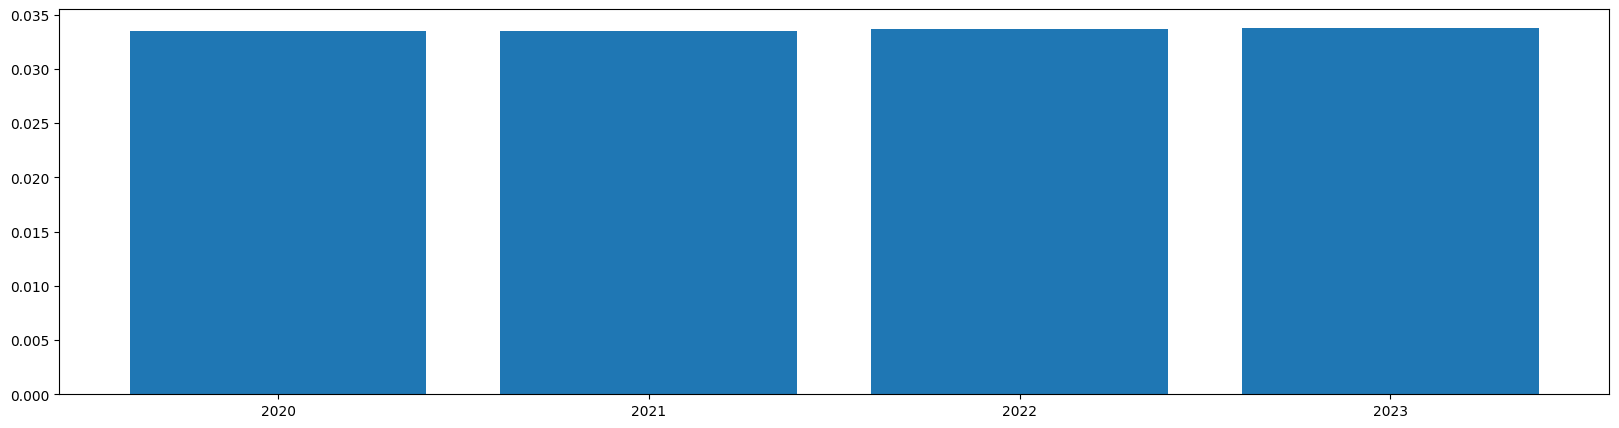

In [246]:
# Make a random dataset:
height = [total_2020 * .0000000001 , total_2021 * .0000000001 , total_2022 * .0000000001 ,total_2023*.0000000001]
bars = ('2020','2021', '2022', '2023')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()




**Create a pie chart**.  The two segments of the chart are **1) the population of California in 2023 and 2) the population of the rest of the U.S. in 2023**.  Create it with meaningful legends and colors and a title. (15 points)

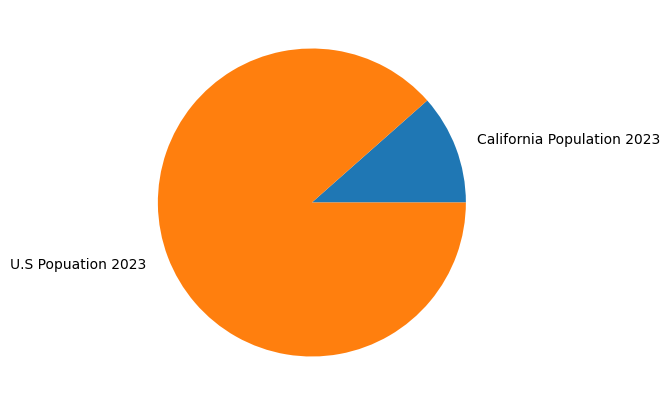

In [ ]:
total_minus = total_2023 - cali_2023

plt.rcParams["figure.figsize"] = (20,5)
# create random data
names='California Population 2023', 'U.S Popuation 2023'
values=[cali_2023,total_minus]


# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15);
plt.show();


**HINT:**

```
Review the LinkedIn Learning videos that covered loc[] and iloc[]

data frame manipulation methods, such as drop() and reset_index()

Depending on what package you use to create your graphs, they can be a little tricky.  
Place close attention on whether they take as parameters data frames, numpy lists or variables.  
If numpy lists or variables, you may need to convert portions of your data frame to a numpy list or extract values.  
Methods such as df.values and np.array may be useful.
```

